In [45]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
board_games = pd.read_csv("board_games.csv")
board_games=board_games.dropna(axis=0)
board_games = board_games[board_games["users_rated"]>0]
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [46]:
board_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
id                      56894 non-null int64
type                    56894 non-null object
name                    56894 non-null object
yearpublished           56894 non-null float64
minplayers              56894 non-null float64
maxplayers              56894 non-null float64
playingtime             56894 non-null float64
minplaytime             56894 non-null float64
maxplaytime             56894 non-null float64
minage                  56894 non-null float64
users_rated             56894 non-null int64
average_rating          56894 non-null float64
bayes_average_rating    56894 non-null float64
total_owners            56894 non-null int64
total_traders           56894 non-null int64
total_wanters           56894 non-null int64
total_wishers           56894 non-null int64
total_comments          56894 non-null int64
total_weights           56894 non-null int64
average_weight  

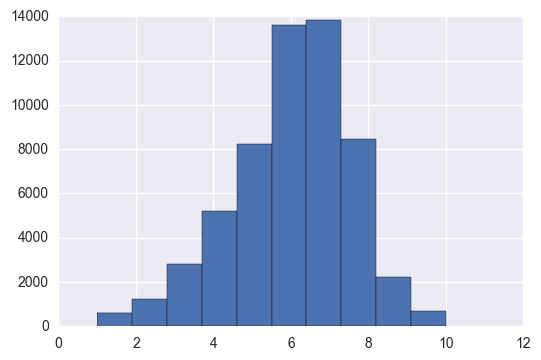

standard deviation and mean of average rating 1.5788299348332662 6.016112849333889


In [47]:
plt.hist(board_games["average_rating"])
plt.show()
average_rating_std = board_games["average_rating"].std()
average_rating_mean = board_games["average_rating"].mean()
print("standard deviation and mean of average rating", average_rating_std, average_rating_mean)

# Error metric
In this data set, using mean squared error as an error metric makes sense. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

In [48]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric_columns = board_games[cols].dropna(axis=0)

clus.fit(numeric_columns)
labels=clus.labels_


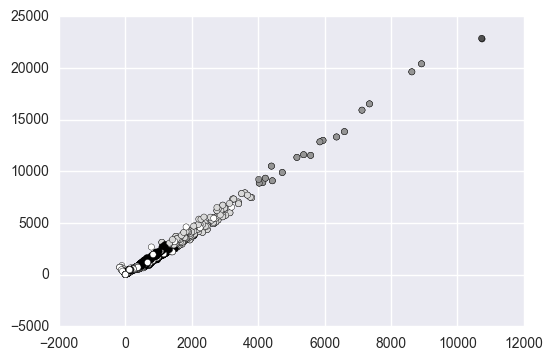

In [49]:
def row_mean(row):
    return row.mean()
def row_std(row):
    return row.std()
numeric_columns["game_mean"] = numeric_columns.apply(row_mean, axis=1)
numeric_columns["game_std"] = numeric_columns.apply(row_std, axis=1)

plt.scatter(x=numeric_columns["game_mean"], y=numeric_columns["game_std"],c=labels)
plt.show()

# Game clusters
It looks like most of the games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games. So most games don't get played much, but a few get a lot of players.

In [50]:
correlations = numeric_columns.corr()
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
game_mean               0.153087
game_std                0.115574
Name: average_rating, dtype: float64

# Correlations
The yearpublished column is surprisingly highly correlated with average_rating, showing that more recent games tend to be rated more highly. Games for older players (minage is high) tend to be more highly rated. The more "weighty" a game is (average_weight is high), the more highly it tends to be rated.

In [51]:
cols.remove("bayes_average_rating")
cols.remove("average_rating")
numeric = numeric_columns[cols]

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(numeric, numeric_columns["average_rating"] )
predictions = lr.predict(numeric)

error = ((predictions - numeric_columns["average_rating"])**2).mean()
print(error)

2.0933969758339424


# Game clusters
The error rate is close to the standard deviation of all board game ratings. This indicates that our model may not have high predictive power. We'll need to dig more into which games were scored well, and which ones weren't.